In [2]:
import numpy as np
train_imgs_path = 'F:/SR/train_imgs.npy'
train_imgs = np.load(train_imgs_path)

In [3]:
train_imgs.shape

(219, 6, 1640, 1640)

In [4]:
from pathlib import Path
import xarray as xr
import matplotlib.pyplot as plt

root = Path('F:\SR')
assert root.exists()

train_imgs = list((root/'lake_MODIS').glob('*.tif'))
train_tars = list((root/'lake_Landsat').glob('*.tif'))

In [5]:
import rioxarray as rxr
for i in range(len(train_imgs)):
    img = rxr.open_rasterio(train_imgs[i])
    print(img.shape)

(6, 1233, 2004)
(6, 1233, 2004)
(6, 1233, 2004)
(6, 1233, 2004)
(6, 1233, 2004)
(6, 1233, 2004)
(6, 1233, 2004)
(6, 1233, 2004)
(6, 1233, 2004)
(6, 1233, 2004)
(6, 1233, 2004)
(6, 1233, 2004)


In [10]:
from pathlib import Path
import rioxarray as rxr
import numpy as np
from scipy.ndimage import distance_transform_edt

def fill_nan_with_zero(img_array):
    """
    Fill all NaN values with zero.
    """
    return np.nan_to_num(img_array, nan=0.0)

# Root directory containing training data
root = Path('F:/SR')
assert root.exists()

# Get the list of input image paths
train_imgs = list((root / 'lake_Landsat').glob('*.tif'))

# Initialize the output array
output_array = np.zeros((len(train_imgs), 6, 1200, 2000), dtype=np.float32)

# Process each image
for idx, img_path in enumerate(train_imgs):
    # Open the image
    img = rxr.open_rasterio(img_path).values  # Shape: (6, H, W)
    
    # Handle NaN values using nearest valid pixel
    img = fill_nan_with_zero(img)
    
    # Crop to the desired size
    img_cropped = img[:, :1200, :2000]  # Shape: (6, 1200, 2000)
    
    # Store in the output array
    output_array[idx] = img_cropped

# Save the result to a .npy file
output_file = root / 'processed_tars_images.npy'
np.save(output_file, output_array)

# Check for NaN in the output array
if np.isnan(output_array).any():
    print("Warning: output_array still contains NaN values!")
else:
    print(f"Processed images saved to {output_file}, and no NaN values remain.")


Processed images saved to F:\SR\processed_tars_images.npy, and no NaN values remain.


In [ ]:
output_array

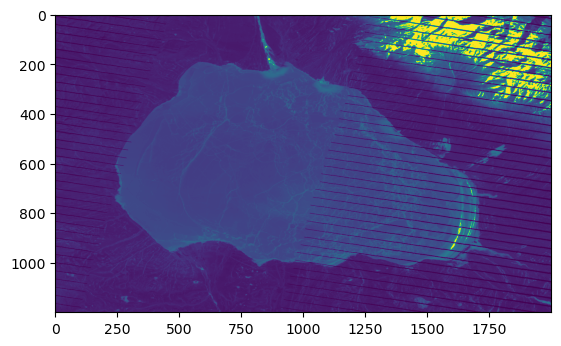

In [12]:
plt.imshow(output_array[0, 0])

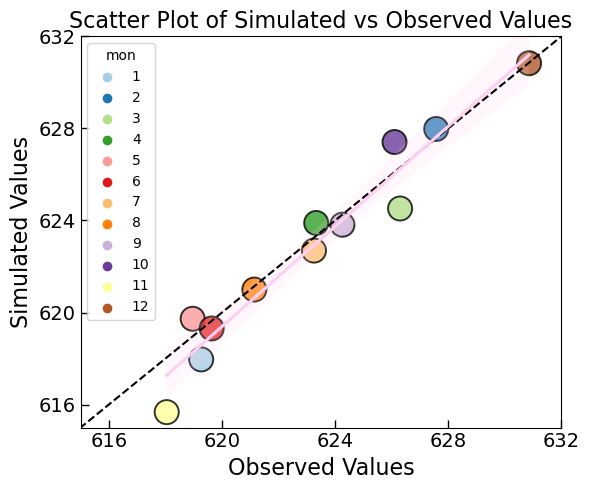

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
data = pd.read_csv('../data/sim_vs_obs.csv')
# Initialize the plot
plt.figure(figsize=(6, 5))

# Scatter plot: Different colors for each month
scatter = sns.scatterplot(
    data=data, x='obs', y='sim', hue='mon', palette='Paired', s=300, edgecolor='k', alpha=0.8
)

# Add 1:1 line
min_val = min(data['obs'].min() - 5, data['sim'].min() - 5)
max_val = max(data['obs'].max() + 5, data['sim'].max() + 5)
plt.plot([min_val, max_val], [min_val, max_val], '--', color='black')

# Fit and plot regression line
sns.regplot(
    data=data, x='obs', y='sim', scatter=False, color='#FFCFEF', line_kws={'label': 'Fit Line'}
)

# Customize the plot
plt.xlabel('Observed Values', fontsize=16)
plt.ylabel('Simulated Values', fontsize=16)
plt.title('Scatter Plot of Simulated vs Observed Values', fontsize=16)
plt.xlim(615, 632)
plt.ylim(615, 632)
plt.grid(False)

# Adjust tick parameters to make ticks point inward
plt.tick_params(axis='both', direction='in', length=6, width=1, labelsize=14)
plt.xticks(ticks=np.arange(616, 633, 4))
plt.yticks(ticks=np.arange(616, 633, 4))

# Remove legend
#plt.legend([],[], frameon=False)

# Show the plot
plt.tight_layout()
#plt.savefig('../figure/lake_area_scatter.svg')



In [32]:
pre_files

['L_2013-5-30.tif',
 'L_2014-2-10.tif',
 'L_2014-4-15.tif',
 'L_2014-9-6.tif',
 'L_2015-2-13.tif',
 'L_2015-3-17.tif',
 'L_2015-5-4.tif',
 'L_2015-6-21.tif',
 'L_2015-7-7.tif',
 'L_2015-9-25.tif',
 'L_2016-1-31.tif',
 'L_2016-10-13.tif',
 'L_2016-4-20.tif',
 'L_2016-6-7.tif',
 'L_2016-8-26.tif',
 'L_2017-2-18.tif',
 'L_2017-5-25.tif',
 'L_2017-6-10.tif',
 'L_2017-7-28.tif',
 'L_2017-8-29.tif',
 'L_2018-1-4.tif',
 'L_2018-10-19.tif',
 'L_2018-10-3.tif']

In [33]:
obs_files

['L_2013-5-30.tif',
 'L_2014-2-10.tif',
 'L_2014-4-15.tif',
 'L_2014-9-6.tif',
 'L_2015-2-13.tif',
 'L_2015-3-17.tif',
 'L_2015-5-4.tif',
 'L_2015-6-21.tif',
 'L_2015-7-7.tif',
 'L_2015-9-25.tif',
 'L_2016-1-31.tif',
 'L_2016-10-13.tif',
 'L_2016-4-20.tif',
 'L_2016-6-7.tif',
 'L_2016-8-26.tif',
 'L_2017-2-18.tif',
 'L_2017-5-25.tif',
 'L_2017-6-10.tif',
 'L_2017-7-28.tif',
 'L_2017-8-29.tif',
 'L_2018-1-4.tif',
 'L_2018-10-19.tif',
 'L_2018-10-3.tif',
 'L_2018-12-6.tif',
 'L_2018-2-5.tif',
 'L_2018-3-25.tif',
 'L_2018-5-12.tif']

In [34]:
import rioxarray as rxr
import numpy as np
import os
from scipy.stats import pearsonr

# 1. 定义文件夹路径
path_pre_folder = "F:/SR/AHB/Landsat_pre"
path_obs_folder = "F:/SR/AHB/Landsat"

# 2. 获取文件列表
pre_files = sorted([f for f in os.listdir(path_pre_folder) if f.endswith('.tif')])
obs_files = sorted([f for f in os.listdir(path_obs_folder) if f.endswith('.tif')])[:len(pre_files)]

# 确保文件名一致
if pre_files != obs_files:
    raise ValueError("File names in the two directories do not match.")

# 3. 初始化存储相关系数的列表
correlation_results = []

# 4. 遍历文件并计算相关系数
for pre_file, obs_file in zip(pre_files, obs_files):
    pre_path = os.path.join(path_pre_folder, pre_file)
    obs_path = os.path.join(path_obs_folder, obs_file)

    # 读取GeoTIFF文件
    data_pre = rxr.open_rasterio(pre_path).isel(band=0).values
    data_obs = rxr.open_rasterio(obs_path).isel(band=0).values

    # 过滤NaN值
    valid_mask = ~np.isnan(data_pre) & ~np.isnan(data_obs)
    valid_pre = data_pre[valid_mask]
    valid_obs = data_obs[valid_mask]

    # 计算相关系数
    if len(valid_pre) > 1:  # 至少需要两个点计算相关系数
        corr, _ = pearsonr(valid_pre, valid_obs)
    else:
        corr = np.nan

    # 存储结果
    correlation_results.append({"file": pre_file, "correlation": corr})

# 5. 打印结果
for result in correlation_results:
    print(f"File: {result['file']}, Correlation: {result['correlation']}")


d:\miniconda\envs\torch\lib\site-packages\rioxarray\_io.py:1111: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
d:\miniconda\envs\torch\lib\site-packages\rioxarray\_io.py:1111: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
d:\miniconda\envs\torch\lib\site-packages\rioxarray\_io.py:1111: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
d:\miniconda\envs\torch\lib\site-packages\rioxarray\_io.py:1111: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warnin

File: L_2013-5-30.tif, Correlation: 0.37872166405378715
File: L_2014-2-10.tif, Correlation: 0.5351155819240228
File: L_2014-4-15.tif, Correlation: 0.5556174220754204
File: L_2014-9-6.tif, Correlation: 0.748442520188126
File: L_2015-2-13.tif, Correlation: 0.5488163591170083
File: L_2015-3-17.tif, Correlation: 0.5591153883690121
File: L_2015-5-4.tif, Correlation: 0.5420563500223095
File: L_2015-6-21.tif, Correlation: 0.6980291843398972
File: L_2015-7-7.tif, Correlation: 0.6701785632363924
File: L_2015-9-25.tif, Correlation: 0.38606935361455597
File: L_2016-1-31.tif, Correlation: 0.4551238497226675
File: L_2016-10-13.tif, Correlation: 0.4501106576687538
File: L_2016-4-20.tif, Correlation: 0.49012815971308243
File: L_2016-6-7.tif, Correlation: 0.3864158296980166
File: L_2016-8-26.tif, Correlation: 0.7576947003546903
File: L_2017-2-18.tif, Correlation: 0.5375059563824385
File: L_2017-5-25.tif, Correlation: 0.5300493584453442
File: L_2017-6-10.tif, Correlation: 0.6264598116772827
File: L_201

In [13]:
data_pre

<xarray.DataArray (band: 6, y: 1233, x: 2004)>
[14825592 values with dtype=float32]
Coordinates:
  * band         (band) int32 1 2 3 4 5 6
  * x            (x) float64 97.33 97.33 97.33 97.33 ... 97.87 97.87 97.87 97.87
  * y            (y) float64 38.47 38.47 38.47 38.47 ... 38.14 38.14 38.14 38.14
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0

In [14]:
import rioxarray as rxr
import numpy as np
import pandas as pd
import random

# 1. 读取GeoTIFF文件
path_pre = "F:/SR/AHB/Landsat_pre/L_2016-8-26.tif"
path_obs = "F:/SR/AHB/Landsat/L_2016-8-26.tif"

data_pre = rxr.open_rasterio(path_pre)
data_obs = rxr.open_rasterio(path_obs)

# 2. 提取第0个波段的数据
band_pre = data_pre.isel(band=0).values
band_obs = data_obs.isel(band=0).values

# 3. 获取非NaN的坐标索引
valid_indices = np.argwhere(~np.isnan(band_pre) & ~np.isnan(band_obs))

# 4. 随机采样1000个点
sample_indices = valid_indices[random.sample(range(len(valid_indices)), 500)]

# 5. 提取采样点的值
pre_values = band_pre[sample_indices[:, 0], sample_indices[:, 1]]
obs_values = band_obs[sample_indices[:, 0], sample_indices[:, 1]]

# 6. 生成DataFrame
df = pd.DataFrame({"pre": pre_values, "obs": obs_values})

# 7. 数据准备完成，可以用用户提供的代码绘制散点密度图
print(df.head())


   pre  obs
0   26   29
1   26   25
2   23   20
3   21   22
4   30   30


d:\miniconda\envs\torch\lib\site-packages\rioxarray\_io.py:1111: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore


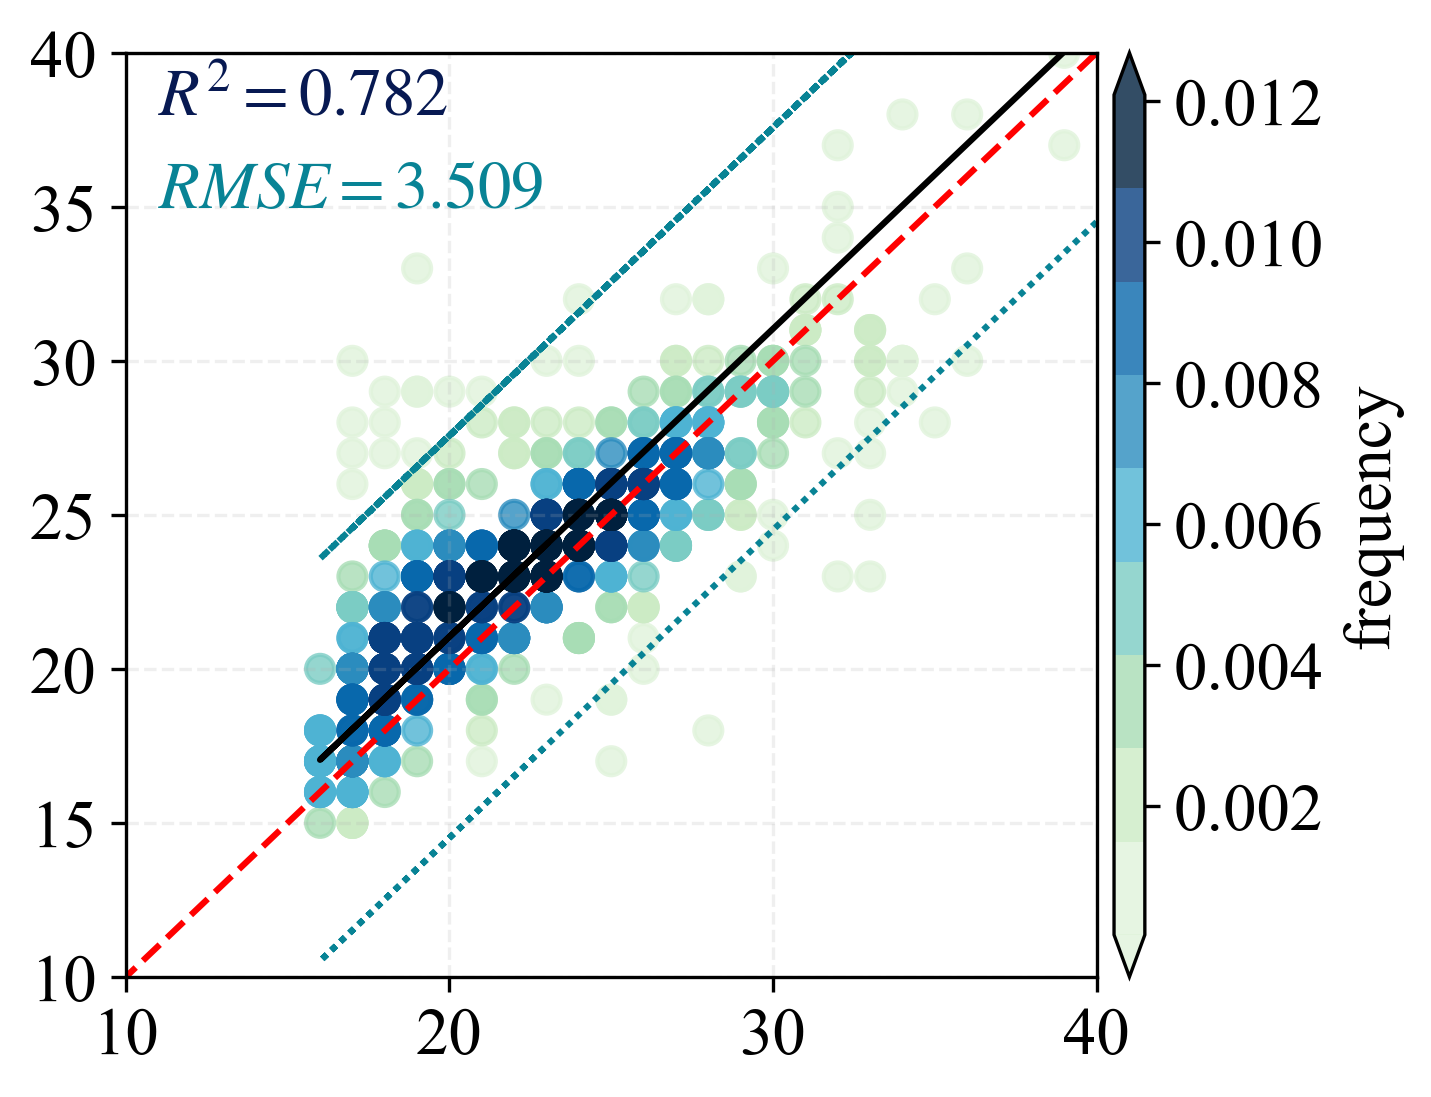

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib import rcParams
from statistics import mean
from sklearn.metrics import explained_variance_score,r2_score,median_absolute_error,mean_squared_error,mean_absolute_error
from scipy.stats import pearsonr
import cmaps
# 加载数据（PS：原始数据太多，采样10000）
# 默认是读取csv/xlsx的列成DataFrame


config = {"font.family":'Times New Roman',"font.size": 16,"mathtext.fontset":'stix'}
rcParams.update(config)
scale = 40
confidence_level = 0.95
#df = df.sample(5000)
# 用于计算指标
x = df['obs']; y = df['pre']

BIAS = mean(x - y)
MSE = mean_squared_error(x, y)
RMSE = np.power(MSE, 0.5)
R2 = pearsonr(x, y)[0]
adjR2 = 1-((1-r2_score(x,y))*(len(x)-1))/(len(x)-5-1)
MAE = mean_absolute_error(x, y)
EV = explained_variance_score(x, y)
NSE = 1 - (RMSE ** 2 / np.var(x))
# 计算散点密度
xy = np.vstack([x, y])
z = stats.gaussian_kde(xy)(xy)
idx = z.argsort()
x, y, z = x.iloc[idx], y.iloc[idx], z[idx] 

# 拟合（若换MK，自行操作）最小二乘
def slope(xs, ys):
    m = (((mean(xs) * mean(ys)) - mean(xs * ys)) / ((mean(xs) * mean(xs)) - mean(xs * xs)))
    b = mean(ys) - m * mean(xs)
    return m, b
k, b = slope(x, y)
regression_line = []
for a in x:
    regression_line.append((k * a) + b)
slope, intercept = np.polyfit(x, regression_line, 1)
n = 1
t_value = 1.95  # 95% 置信区间对应的 t 值
std_err = np.std(y - (slope * x + intercept))
margin_of_error = t_value * (std_err / np.sqrt(n))
lower_confidence_bound = slope * x + intercept - margin_of_error
upper_confidence_bound = slope * x + intercept + margin_of_error

fig, ax = plt.subplots(figsize=(5, 4), dpi=300)
plt.plot(x, lower_confidence_bound, linestyle='-', color='#088395', dashes=(1, 1), label='95% Prediction Band')
plt.plot(x, upper_confidence_bound, linestyle='-', color='#088395', dashes=(1, 1))
scatter = ax.scatter(x, y, marker='o', c=z, edgecolors=None, s=45, cmap=cmaps.CBR_wet[2:],  alpha=0.8)
cbar = plt.colorbar(scatter, shrink=1, orientation='vertical', extend='both', pad=0.015, aspect=30, label='frequency')
plt.plot([-scale, scale], [-scale, scale], 'red', lw=1.5, linestyle='--', label='1:1 line')  # 画的1:1线，线的颜色为black，线宽为0.8
plt.plot(x, regression_line, 'black', lw=1.5, label='Regression Line')  # 预测与实测数据之间的回归线
ax.grid(True, linestyle='--', alpha=0.2)



plt.text(11,38, '$R^2=%.3f$' % R2, family = 'Times New Roman', horizontalalignment='left', color='#071952')


#plt.text(28,-22.5, '$MAE=%.3f$' % MAE, family = 'Times New Roman', horizontalalignment='right')
plt.text(11,35, '$RMSE=%.3f$' % RMSE, family = 'Times New Roman', horizontalalignment='left',color='#088395')



plt.axis([10, scale, 10, scale])  # 设置线的范围
#ax.legend(loc='upper left', frameon = False)
plt.savefig('D:/Onedrive/GitHub/MosicaFormer/figure/scatter.svg', format="svg", dpi=300, bbox_inches = 'tight')
plt.show()

In [8]:
pearsonr(x, y)[1]

1.624269918279894e-36